In [2]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [3]:
np.set_printoptions(suppress=True)

In [4]:
reload(h_env)

/home/pablosbl/Documents/GitHub/hockey-en-mallorca/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/pablosbl/Documents/GitHub/hockey-en-mallorca/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from '/home/pablosbl/Documents/GitHub/hockey-en-mallorca/hockey-env/hockey/hockey_env.py'>

# Normal Game Play

In [5]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [11]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [13]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [14]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.18451960717416707,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [15]:
env.close()

# Train Shooting

In [25]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [26]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [28]:
env.close()

# Train DEFENDING

In [31]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [36]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

0.0
0.0
-0.5218756666621908
-0.4115145314897222
-0.32359058694674814
-0.23781589804152123
-0.15829680296109486
-0.10180249884540855
-0.14911142746024741
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0


In [37]:
env.close()

# Using discrete actions

In [38]:
import random

In [39]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [40]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [41]:
env.close()

# Hand-crafted Opponent

In [42]:
env = h_env.HockeyEnv()

In [43]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [46]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [47]:
np.mean(obs_buffer,axis=0)

array([-2.82676615,  0.03133272, -0.04935409, -0.0515305 ,  0.01109931,
        0.11565923,  2.92512263,  0.23915364, -0.00859179,  0.05568374,
        0.01601034, -0.0124214 ,  0.33164369,  0.12477246,  1.06209683,
       -0.0158595 ,  2.09163347,  1.25498008])

In [48]:
np.std(obs_buffer,axis=0)

array([ 0.68843901,  0.54956486,  0.64105185,  4.51917485,  3.45032345,
        3.24740913,  0.7777765 ,  0.40848211,  0.14052209,  3.3173507 ,
        1.46938754,  0.70629959,  2.02996526,  1.47776592, 18.91125138,
       11.29657881,  4.38527618,  3.54800953])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [49]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [50]:
import pylab as plt

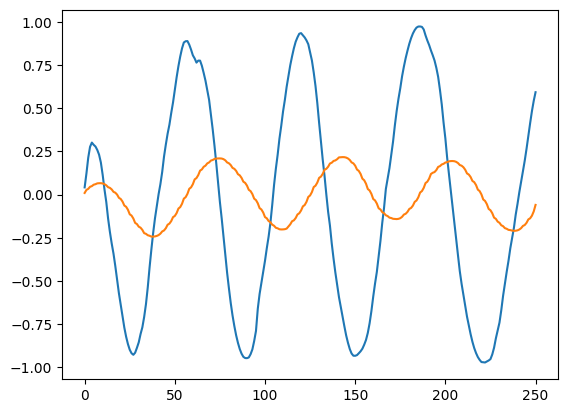

In [51]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

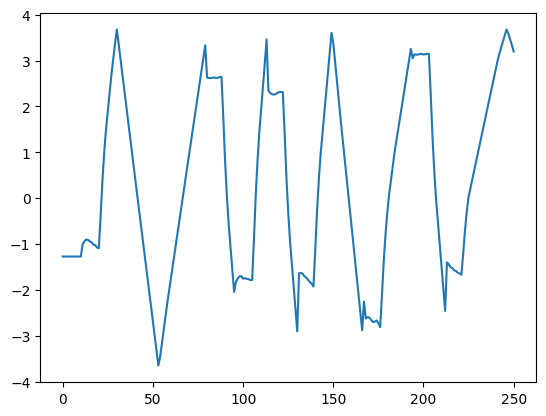

In [52]:
plt.plot(obs_buffer[:,12])

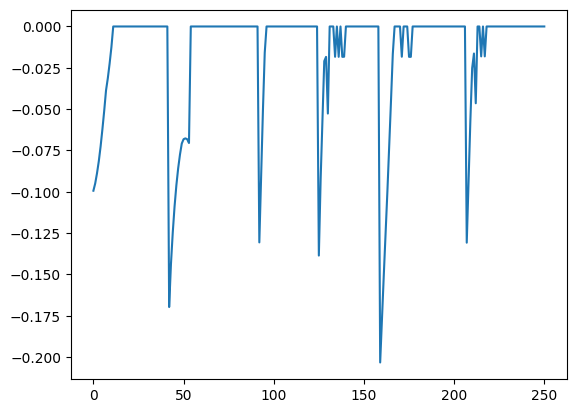

In [53]:
plt.plot(reward_buffer[:])

In [54]:
np.sum(reward_buffer)

-3.9018276870955337

In [55]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0011434111022949219},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0011434111022949219},
 0.0,
 0.0)

In [56]:
env.close()

# Human Opponent

In [65]:
env = h_env.HockeyEnv()

In [66]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [64]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [68]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

KeyboardInterrupt: 

In [69]:
env.close()

# Check side consistency

In [70]:
env = h_env.HockeyEnv()

In [71]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [72]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [73]:
obs_buffer.shape

(150009, 18)

In [74]:
np.mean(obs_buffer,axis=0)

array([-2.9667449 , -0.00335446, -0.00246629, -0.05212371, -0.00811112,
        0.01530445,  2.95512639, -0.00844077,  0.00292246,  0.05477026,
       -0.00909462, -0.00427409, -0.02157619, -0.01487874,  0.03446845,
       -0.00031582,  1.12483251,  1.11793292])

In [75]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([-0.01483786, -0.00732053,  0.00070694, -0.01146288, -0.00085244,
       -0.0053426 ,  0.01462091,  0.00726733, -0.00070744,  0.01133297,
        0.00085172,  0.00531421,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00271695, -0.00272435])

In [76]:
winner_buffer

[1,
 0,
 -1,
 0,
 1,
 -1,
 0,
 1,
 0,
 1,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 1,
 -1,
 0,
 0,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 0,
 -1,
 0,
 -1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 0,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 1,
 0,
 0,
 -1,
 0,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 0,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 -1,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1

In [77]:
np.mean(winner_buffer,axis=0)

-0.001

In [78]:
np.std(winner_buffer,axis=0)

0.8031182976374028

In [79]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(-4267.93539173375, -4264.823763658058)

In [80]:
env.close()